In [1]:
import librosa
y, sr = librosa.load('../data/raw/AmbisonicSoundLibrary/nature/Anna Bay Cicadas.mp3',sr=16000, duration=10)
sr

16000

In [2]:
y_mono = librosa.to_mono(y)
y_mono

array([ 3.2731437e-13, -4.4055832e-13,  2.8146596e-13, ...,
       -5.2901576e-03,  8.1505038e-02, -7.0461497e-02], dtype=float32)

In [16]:
from soundsig.sound import BioSound


myBioSound = BioSound(soundWave=y_mono, fs=sr)
myBioSound.mpsCalc(window=.2, Norm = True)


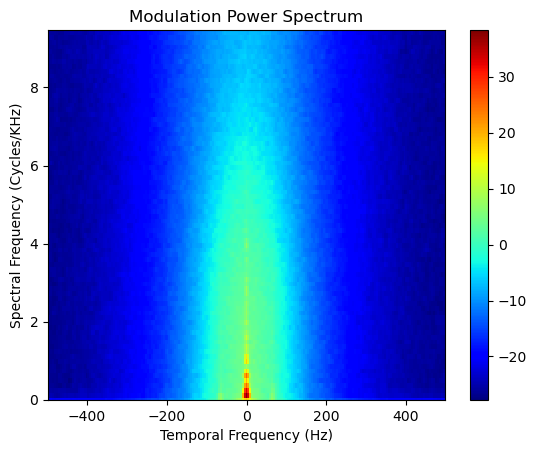

In [18]:
import matplotlib.pyplot as plt
import numpy as np
DBNOISE=100
plt.figure()
plt.clf()
cmap = plt.get_cmap('jet')
ex = (myBioSound.wt.min(), myBioSound.wt.max(), myBioSound.wf.min()*1e3, myBioSound.wf.max()*1e3)
logMPS = 10.0*np.log10(myBioSound.mps)
maxMPS = logMPS.max()
minMPS = maxMPS-DBNOISE
logMPS[logMPS < minMPS] = minMPS
plt.imshow(logMPS, interpolation='nearest', aspect='auto', origin='lower', cmap=cmap, extent=ex)
plt.ylabel('Spectral Frequency (Cycles/KHz)')
plt.xlabel('Temporal Frequency (Hz)')
plt.colorbar()
plt.ylim((0,myBioSound.wf.max()*1e3))
plt.title('Modulation Power Spectrum')
plt.show()

In [5]:
myBioSound.wf*8000

array([-75.75163399, -74.75490196, -73.75816993, -72.76143791,
       -71.76470588, -70.76797386, -69.77124183, -68.7745098 ,
       -67.77777778, -66.78104575, -65.78431373, -64.7875817 ,
       -63.79084967, -62.79411765, -61.79738562, -60.80065359,
       -59.80392157, -58.80718954, -57.81045752, -56.81372549,
       -55.81699346, -54.82026144, -53.82352941, -52.82679739,
       -51.83006536, -50.83333333, -49.83660131, -48.83986928,
       -47.84313725, -46.84640523, -45.8496732 , -44.85294118,
       -43.85620915, -42.85947712, -41.8627451 , -40.86601307,
       -39.86928105, -38.87254902, -37.87581699, -36.87908497,
       -35.88235294, -34.88562092, -33.88888889, -32.89215686,
       -31.89542484, -30.89869281, -29.90196078, -28.90522876,
       -27.90849673, -26.91176471, -25.91503268, -24.91830065,
       -23.92156863, -22.9248366 , -21.92810458, -20.93137255,
       -19.93464052, -18.9379085 , -17.94117647, -16.94444444,
       -15.94771242, -14.95098039, -13.95424837, -12.95

In [22]:
myBioSound.wt

array([-499.5004995, -498.5014985, -497.5024975, ...,  497.5024975,
        498.5014985,  499.5004995])

In [23]:
myBioSound.mps.shape

(153, 1001)

In [6]:
# Calculate the spectrogram and the rms
myBioSound.spectroCalc(spec_sample_rate=1000, freq_spacing = 50, min_freq=0, max_freq=(sr/2))
myBioSound.rms = myBioSound.sound.std() 

# Calculate amplitude enveloppe
myBioSound.ampenv(cutoff_freq = 20, amp_sample_rate = 1000)

# Calculate the power spectrum
myBioSound.spectrum(f_high=(sr/2)-1)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                Bird b'Unknown'    Call Type b'U'


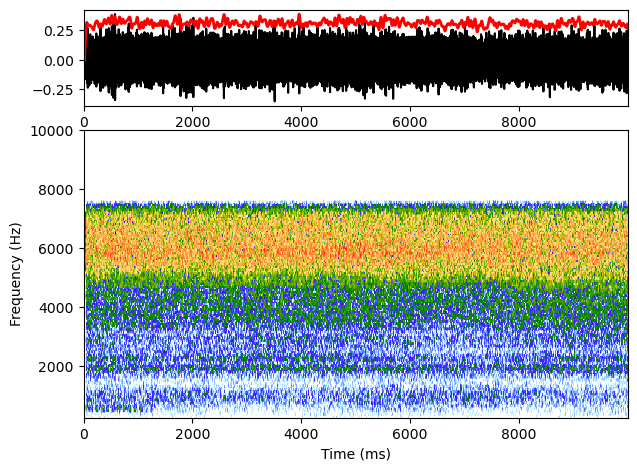

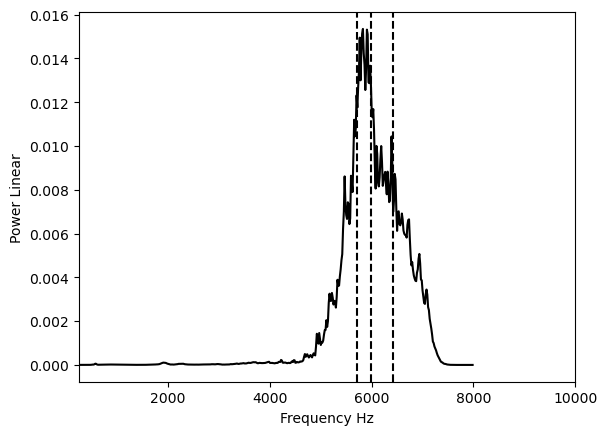

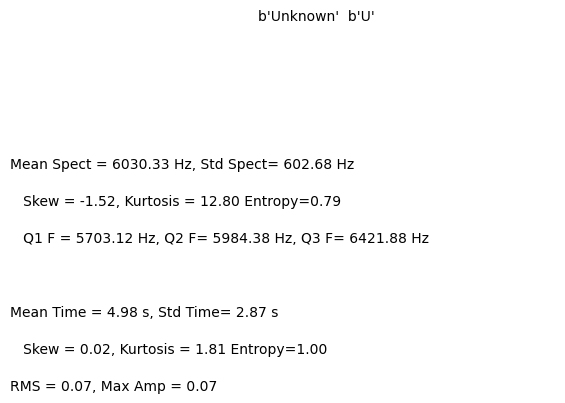

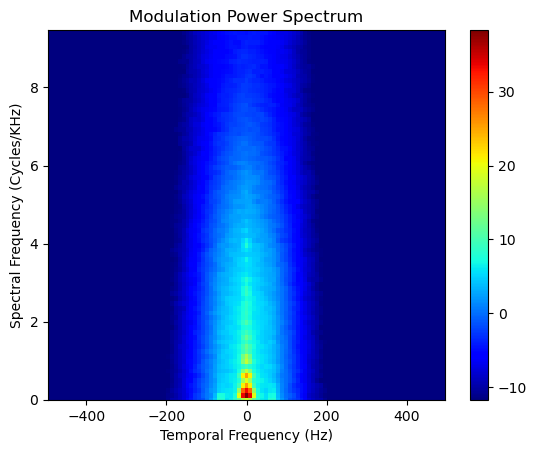

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [8]:
# Calculate fundamental and related values.  These are the default values.
# For the estimation of the fundamental, four methods are available: 
# 'AC' - Peak of the auto-correlation function
# 'ACA' - Peak of envelope of auto-correlation function 
# 'Cep' - First peak in cepstrum 
# 'Stack' - Fitting of harmonic stacks (default - works well for zebra finches)

# myBioSound.fundest(maxFund = 1500, minFund = 300, lowFc = 200, highFc = 6000, 
#                    minSaliency = 0.5, debugFig = 0, 
#                    minFormantFreq = 500, maxFormantBW = 500, windowFormant = 0.1,
#                    method='Stack')

# Calculate the MPS
myBioSound.mpsCalc(window=.1, Norm = True)

print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
print('                Bird %s    Call Type %s' % (myBioSound.emitter, myBioSound.type))
myBioSound.plot(DBNOISE=50, f_low=250, f_high=10000)  
print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')


In [6]:
myBioSound.mps.shape

(153, 101)